evaluacion de modelo a través de cos similarity

computa la métrica de error: $$ \frac{\#(Eval_{reales} \cap Eval_{actual})}{\#Eval_{reales}} $$

In [2]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
pd.options.mode.chained_assignment = None  # default='warn'

from joblib import dump, load

## datos de evaluador y topico

In [4]:
topic_values_gt = load('../../trained_models/archivos/topicos_por_evaluador_trained.pkl')
topic_values_gt.reset_index(drop=False,inplace=True)
usuario_entreanado = topic_values_gt["CVU"].tolist()
rcea_entreanado = topic_values_gt["CVU"].tolist()
topic_values_gt.tail(2)

FileNotFoundError: [Errno 2] No such file or directory: '../../trained_models/archivos/topicos_por_evaluador_trained.pkl'

## datos de proyecto a evaluar

In [14]:
topic_values_gt_test = load("../trained_models/archivos/topicos_por_texto_test.pkl")
id_proyecto_index = topic_values_gt_test["ID_PROYECTO"].tolist()

topic_values_gt_test.tail(2)

FileNotFoundError: [Errno 2] No such file or directory: '../trained_models/archivos/topicos_por_texto_test.pkl'

In [115]:
topic_values_gt_test.shape

(389, 101)

### cosine similarity

In [116]:
from sklearn.metrics.pairwise import cosine_similarity
cos_simi = cosine_similarity(topic_values_gt.iloc[:,2:], topic_values_gt_test.iloc[:,1:])

In [117]:
df_cos_simi = pd.DataFrame(cos_simi)

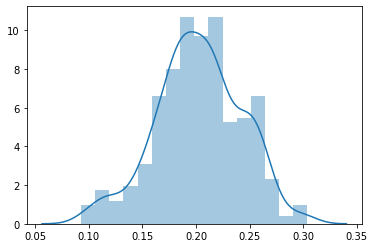

In [118]:
df_cos_simi = pd.DataFrame(cos_simi)
sns.distplot(df_cos_simi.mean(axis=0))

In [119]:
df_cos_simi.head()

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
0,0.044997,0.118679,0.059040,0.412048,0.517541,0.030115,0.239514,0.145793,0.040603,0.020909,...,0.086611,0.124601,0.065908,0.030654,0.051909,0.083267,0.064870,0.031586,0.554849,0.095681
1,0.145857,0.144713,0.209202,0.243231,0.095997,0.106870,0.148079,0.117076,0.251276,0.139658,...,0.095122,0.144159,0.089223,0.085952,0.253238,0.102771,0.217642,0.102900,0.146098,0.080486
2,0.194204,0.062942,0.172203,0.529579,0.188717,0.108772,0.138377,0.192329,0.119260,0.083536,...,0.413273,0.191017,0.124704,0.151057,0.169844,0.406496,0.349692,0.339475,0.142302,0.149662
3,0.099225,0.339693,0.106324,0.510900,0.733646,0.070564,0.455335,0.132142,0.186454,0.076415,...,0.114548,0.236425,0.099505,0.091726,0.142689,0.136008,0.259567,0.074290,0.709403,0.150639
4,0.145158,0.037759,0.139365,0.215874,0.098878,0.049727,0.133347,0.090365,0.081385,0.050559,...,0.464724,0.144174,0.125973,0.070919,0.159879,0.391934,0.237544,0.669497,0.097221,0.084240


## encontrar top algom

encontramos elpercentil 97 por fila

In [120]:
df_evaluadores_recomendados = pd.DataFrame(index=[i for i in range(len(id_proyecto_index))]
                                           ,columns=["evaluador_reco_"+str(number) for number in range(5)])
len_list = []

for proyecto in range(df_cos_simi.shape[1]):
    
    list_each_proyecto = df_cos_simi.iloc[:,proyecto].tolist()
    
    
    top_5_idx = np.argsort(list_each_proyecto)[-5:][::-1]
    top_5_idx = [i for i in top_5_idx]

    df_evaluadores_recomendados.iloc[proyecto,:] = [usuario_entreanado[pos] for pos in top_5_idx] 
    
df_evaluadores_recomendados["ID_PROYECTO"] = id_proyecto_index
df_evaluadores_recomendados.set_index("ID_PROYECTO").reset_index(inplace=True,drop=False)

In [121]:
df_evaluadores_recomendados.head()

,evaluador_reco_0,evaluador_reco_1,evaluador_reco_2,evaluador_reco_3,evaluador_reco_4,ID_PROYECTO
0,X_overa25689,X_jtamez67337,X_eazorin49309,X_tcordova122005,X_emoreno122785,612
1,X_icantu19105,X_calfonso,X_jmorales308,X_acruz36219,X_mjayagopal,676
2,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,3785
3,X_marena123520,X_hperez19203,X_rmendoza13735,X_larias94805,X_epena157102,481
4,X_acarranza643,X_ogarcia18968,X_anavarro102694,X_emoreno44251,X_tgollas20040,6061


### verificar pertenencia

In [122]:
df_texto_eval = pd.read_csv("./data/data_training.csv")
df_texto_eval = df_texto_eval.reset_index(drop=True)
df_texto_eval = df_texto_eval[["ID_PROYECTO","USUARIO"]]

In [123]:

df_texto_eval = df_texto_eval.groupby('ID_PROYECTO')['USUARIO'].apply(lambda x: "[%s]" % ', '.join(x))
df_texto_eval.head()

ID_PROYECTO
5     [X_smontanez1370, X_jnicolini13143, X_rcoral11...
6     [X_avera13434, X_lcastillo85758, X_gpineda4002...
11    [X_roropeza122691, X_mmontes26238, X_aromero47...
12    [X_jtorres171556, X_rleyva934, X_fgarcia46075,...
13    [X_mnicho21964, X_imoggio25070, X_clopez89504,...
Name: USUARIO, dtype: object

In [124]:
df_proy_usuarios = pd.DataFrame(index=df_texto_eval.index, columns=["USUARIOS"])
df_proy_usuarios.iloc[:,0] = df_texto_eval.values
df_proy_usuarios.reset_index(drop=False,inplace=True)
df_proy_usuarios.head()

,ID_PROYECTO,USUARIOS
0,5,"[X_smontanez1370, X_jnicolini13143, X_rcoral11..."
1,6,"[X_avera13434, X_lcastillo85758, X_gpineda4002..."
2,11,"[X_roropeza122691, X_mmontes26238, X_aromero47..."
3,12,"[X_jtorres171556, X_rleyva934, X_fgarcia46075,..."
4,13,"[X_mnicho21964, X_imoggio25070, X_clopez89504,..."


## proyectos en conjunto de prueba

In [125]:
df_evaluadores_recomendados = df_evaluadores_recomendados.merge(df_proy_usuarios,on="ID_PROYECTO")
df_evaluadores_recomendados.head()

,evaluador_reco_0,evaluador_reco_1,evaluador_reco_2,evaluador_reco_3,evaluador_reco_4,ID_PROYECTO,USUARIOS
0,X_overa25689,X_jtamez67337,X_eazorin49309,X_tcordova122005,X_emoreno122785,612,"[X_creyes121133, X_overa25689, X_eazorin49309,..."
1,X_icantu19105,X_calfonso,X_jmorales308,X_acruz36219,X_mjayagopal,676,"[X_jcarriquiry10097, X_hrubio120252, X_icantu1..."
2,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,3785,"[X_rmachorro1817, X_rramos12568, X_acruz14475,..."
3,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,3785,"[X_rmachorro1817, X_rramos12568, X_acruz14475,..."
4,X_marena123520,X_hperez19203,X_rmendoza13735,X_larias94805,X_epena157102,481,"[X_marena123520, X_jezquerra12270, X_jsalazar1..."


contamos cuantos si los 5 evals propuestos estan en los evaluadores reales:

In [126]:
matches_list = []
for proyecto in range(len(df_evaluadores_recomendados)):
    
    lista_evaluadores_reales = df_evaluadores_recomendados.iloc[proyecto,-1].replace(
        ']','').replace(" ","").replace('[','').replace('"','').split(",")
    
    lista_matches = len([ev_recom for ev_recom in df_evaluadores_recomendados.iloc[proyecto,:-3].tolist()
                         if ev_recom in lista_evaluadores_reales])
    lista_eval_len = len(lista_evaluadores_reales)
    
    metrica = lista_matches/lista_eval_len
    
    matches_list.append(metrica)

df_evaluadores_recomendados["metrica"] = matches_list

df_evaluadores_recomendados.head()

,evaluador_reco_0,evaluador_reco_1,evaluador_reco_2,evaluador_reco_3,evaluador_reco_4,ID_PROYECTO,USUARIOS,metrica
0,X_overa25689,X_jtamez67337,X_eazorin49309,X_tcordova122005,X_emoreno122785,612,"[X_creyes121133, X_overa25689, X_eazorin49309,...",0.666667
1,X_icantu19105,X_calfonso,X_jmorales308,X_acruz36219,X_mjayagopal,676,"[X_jcarriquiry10097, X_hrubio120252, X_icantu1...",0.333333
2,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,3785,"[X_rmachorro1817, X_rramos12568, X_acruz14475,...",0.600000
3,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,3785,"[X_rmachorro1817, X_rramos12568, X_acruz14475,...",0.600000
4,X_marena123520,X_hperez19203,X_rmendoza13735,X_larias94805,X_epena157102,481,"[X_marena123520, X_jezquerra12270, X_jsalazar1...",0.200000


## función empaquetada

computa la métrica de error: $$ \frac{\#( Eval_{reales} \cap Eval_{actual})}{\#Eval_{reales}} $$

In [127]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.externals import joblib 
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
## leemos lostopicos por evaluador:
def cosine_similarity_metric(topic_values_gt,topic_values_gt_test,df_texto_eval,evaluadores_sugeridos=5):
    """
    obtiene la metrica $$ \frac{ Eval_{reales} \cap Eval_{actual}}{\#Eval_{reales}} $$ para el conjunto 
    de prueba
    
    Devuelve una lista con la metrica por proyecto evaludo
    
    """
    #topic_values_gt

    topic_values_gt.reset_index(drop=False,inplace=True)
    usuario_entreanado = topic_values_gt["USUARIO"].tolist()
    rcea_entreanado = topic_values_gt["CVE_RCEA"].tolist()
    topic_values_gt.head()
    
    # avealuar
    
    id_proyecto_index = topic_values_gt_test["ID_PROYECTO"].tolist()

    # cos simi
    
    cos_simi = cosine_similarity(topic_values_gt.iloc[:,2:], topic_values_gt_test.iloc[:,1:])

    
    
    # top eval
    
    df_evaluadores_recomendados = pd.DataFrame(index=[i for i in range(len(id_proyecto_index))]
                                               ,columns=["evaluador_reco_"+str(number) 
                                                         for number in range(evaluadores_sugeridos)])
    len_list = []

    for proyecto in range(df_cos_simi.shape[1]):

        list_each_proyecto = df_cos_simi.iloc[:,proyecto].tolist()


        top_5_idx = np.argsort(list_each_proyecto)[-evaluadores_sugeridos:][::-1]
        top_5_idx = [i for i in top_5_idx]

        df_evaluadores_recomendados.iloc[proyecto,:] = [usuario_entreanado[pos] for pos in top_5_idx] 

    df_evaluadores_recomendados["ID_PROYECTO"] = id_proyecto_index
    df_evaluadores_recomendados.set_index("ID_PROYECTO").reset_index(inplace=True,drop=False)

    
    # comparar contextos evaluador
    
    df_texto_eval = df_texto_eval.reset_index(drop=True)
    df_texto_eval = df_texto_eval[["ID_PROYECTO","USUARIO"]]
    df_texto_eval = df_texto_eval.groupby('ID_PROYECTO')['USUARIO'].apply(lambda x: "[%s]" % ', '.join(x))
    
    df_proy_usuarios = pd.DataFrame(index=df_texto_eval.index, columns=["USUARIOS"])
    df_proy_usuarios.iloc[:,0] = df_texto_eval.values
    df_proy_usuarios.reset_index(drop=False,inplace=True)
    
    
    # merge textos con conjunto de prueba
    
    df_evaluadores_recomendados = df_evaluadores_recomendados.merge(df_proy_usuarios,on="ID_PROYECTO")
    
    matches_list = []
    for proyecto in range(len(df_evaluadores_recomendados)):

        lista_evaluadores_reales = df_evaluadores_recomendados.iloc[proyecto,-1].replace(
            ']','').replace(" ","").replace('[','').replace('"','').split(",")

        lista_matches = len([ev_recom for ev_recom in df_evaluadores_recomendados.iloc[proyecto,:-3].tolist()
                             if ev_recom in lista_evaluadores_reales])
        lista_eval_len = len(lista_evaluadores_reales)

        metrica = lista_matches/lista_eval_len

        matches_list.append(metrica)

    df_evaluadores_recomendados["metrica"] = matches_list
    
    return df_evaluadores_recomendados

    #return df_evaluadores_recomendados

In [129]:
topic_values_gt = joblib.load('./trained_models/archivos/topicos_por_evaluador.pkl')
topic_values_test = joblib.load("./trained_models/archivos/topicos_por_texto_test.pkl")
df_texto_eval = pd.read_csv("./data/data_training.csv")

In [130]:
df_evaluadores_recomendados = cosine_similarity_metric(topic_values_gt,topic_values_test,df_texto_eval,evaluadores_sugeridos=10)
df_evaluadores_recomendados.head()

,evaluador_reco_0,evaluador_reco_1,evaluador_reco_2,evaluador_reco_3,evaluador_reco_4,evaluador_reco_5,evaluador_reco_6,evaluador_reco_7,evaluador_reco_8,evaluador_reco_9,ID_PROYECTO,USUARIOS,metrica
0,X_overa25689,X_jtamez67337,X_eazorin49309,X_tcordova122005,X_emoreno122785,X_cvazquez2129,X_jmartinez165511,X_hbarron41729,X_rsalceda2619,X_jcalderon16009,612,"[X_creyes121133, X_overa25689, X_eazorin49309,...",0.833333
1,X_icantu19105,X_calfonso,X_jmorales308,X_acruz36219,X_mjayagopal,X_sgarcia70048,X_agranados120374,X_efregoso95418,X_sbelmonte120220,X_rnavarro33703,676,"[X_jcarriquiry10097, X_hrubio120252, X_icantu1...",0.333333
2,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,X_jsossa7036,X_jjuarez164611,X_mvaldes13662,X_mguevara21643,X_fchavez19695,3785,"[X_rmachorro1817, X_rramos12568, X_acruz14475,...",0.600000
3,X_jcalderon16009,X_jdelarosa7101,X_rramos12568,X_dtentori1807,X_omartynyuk15987,X_jsossa7036,X_jjuarez164611,X_mvaldes13662,X_mguevara21643,X_fchavez19695,3785,"[X_rmachorro1817, X_rramos12568, X_acruz14475,...",0.600000
4,X_marena123520,X_hperez19203,X_rmendoza13735,X_larias94805,X_epena157102,X_sperez36168,X_mcancino19656,X_lpavon19937,X_sestrada21580,X_mlinan25988,481,"[X_marena123520, X_jezquerra12270, X_jsalazar1...",0.200000


In [131]:
match_1 = len(df_evaluadores_recomendados[df_evaluadores_recomendados["metrica"]>0])
match_0 = len(df_evaluadores_recomendados[df_evaluadores_recomendados["metrica"]==0])

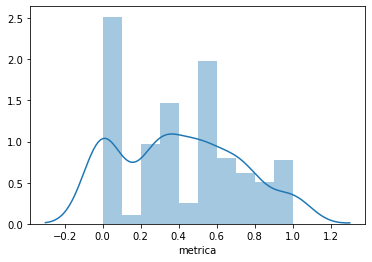

In [132]:
sns.distplot(df_evaluadores_recomendados["metrica"],bins=10)

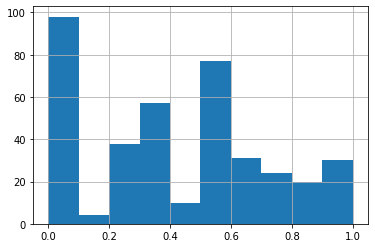

In [133]:
df_evaluadores_recomendados["metrica"].hist(bins=10)